In [ ]:
import sys
import os
from pathlib import Path

notebook_path = "/u/skarmakar1/version_check/llm_steering-main/sk"
sys.path.append(notebook_path)

In [ ]:
import torch
import numpy as np

from inversion_utils import *
import pickle
from sklearn.model_selection import train_test_split


In [ ]:
with open('RR_ckpt/LRR/llama8b/lrr_models.pkl', 'rb') as file:
    lrr_models_9010 = pickle.load(file)

In [ ]:
with open('RR_ckpt/LRR/llama8b/lrr_models_04.pkl', 'rb') as file:
    lrr_models_6040 = pickle.load(file)

In [ ]:
with open('RR_ckpt/LRR/llama8b/lrr_models_07.pkl', 'rb') as file:
    lrr_models_3070 = pickle.load(file)

In [ ]:
thresh = 0.5

In [ ]:
with open(f'/scratch/bbjr/skarmakar/neuinv/min_rank/llama8b/W_b_({thresh}).pkl', 'rb') as file:
    test_weights_9010, test_biases_9010 = pickle.load(file)

/u/skarmakar1/miniconda3/envs/neuinv/lib/python3.10/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))


In [ ]:
with open(f'/scratch/bbjr/skarmakar/neuinv/min_rank/llama8b/W_b_04({thresh}).pkl', 'rb') as file:
    test_weights_6040, test_biases_6040 = pickle.load(file)

In [ ]:
with open(f'/scratch/bbjr/skarmakar/neuinv/min_rank/llama8b/W_b_07({thresh}).pkl', 'rb') as file:
    test_weights_3070, test_biases_3070 = pickle.load(file)

In [7]:
layer = -1

weight_t1, bias_t1 = get_W_b(lrr_models_9010[layer])
weight_t2, bias_t2 = get_W_b(lrr_models_6040[layer])

In [12]:
va1, ve1 = eig(weight_t1)
va1_new = sorted([i.real for i in va1])
va1_img = sorted([i.imag for i in va1])

for i in va1_img:
    if round(i, 3) != 0.0:
        print(i)

for i in va1_new:
    print(round(i, 3))

-0.85
-0.722
-0.68
-0.656
-0.544
-0.521
-0.472
-0.463
-0.459
-0.434
-0.402
-0.388
-0.381
-0.373
-0.36
-0.353
-0.35
-0.337
-0.329
-0.319
-0.318
-0.31
-0.303
-0.298
-0.295
-0.29
-0.287
-0.283
-0.273
-0.267
-0.265
-0.264
-0.255
-0.255
-0.245
-0.24
-0.237
-0.234
-0.231
-0.23
-0.227
-0.224
-0.221
-0.215
-0.212
-0.209
-0.208
-0.206
-0.206
-0.204
-0.202
-0.2
-0.196
-0.194
-0.191
-0.19
-0.187
-0.185
-0.183
-0.181
-0.175
-0.173
-0.172
-0.17
-0.168
-0.167
-0.165
-0.163
-0.161
-0.159
-0.158
-0.156
-0.153
-0.151
-0.151
-0.149
-0.149
-0.145
-0.142
-0.141
-0.14
-0.138
-0.137
-0.136
-0.135
-0.133
-0.131
-0.129
-0.127
-0.126
-0.126
-0.123
-0.122
-0.121
-0.121
-0.12
-0.117
-0.116
-0.115
-0.113
-0.113
-0.111
-0.109
-0.108
-0.107
-0.107
-0.106
-0.105
-0.104
-0.104
-0.101
-0.101
-0.099
-0.098
-0.097
-0.096
-0.095
-0.094
-0.093
-0.092
-0.09
-0.089
-0.089
-0.087
-0.086
-0.086
-0.084
-0.084
-0.083
-0.082
-0.082
-0.08
-0.079
-0.079
-0.077
-0.077
-0.076
-0.075
-0.074
-0.073
-0.073
-0.071
-0.071
-0.07
-0.069
-0

In [13]:
va2, ve2 = eig(weight_t2)
va2_new = sorted([i.real for i in va2])
va2_img = sorted([i.imag for i in va2])

for i in va2_img:
    if round(i, 3) != 0.0:
        print(i)

for i in va2_new:
    print(round(i, 3))

-0.827
-0.686
-0.624
-0.566
-0.507
-0.467
-0.439
-0.412
-0.406
-0.386
-0.383
-0.362
-0.346
-0.334
-0.329
-0.322
-0.318
-0.302
-0.298
-0.291
-0.288
-0.283
-0.274
-0.27
-0.26
-0.252
-0.25
-0.245
-0.242
-0.236
-0.233
-0.232
-0.229
-0.223
-0.22
-0.211
-0.21
-0.204
-0.202
-0.201
-0.2
-0.195
-0.19
-0.188
-0.185
-0.183
-0.18
-0.178
-0.176
-0.175
-0.174
-0.167
-0.166
-0.164
-0.162
-0.159
-0.157
-0.154
-0.153
-0.152
-0.149
-0.147
-0.146
-0.144
-0.14
-0.138
-0.136
-0.134
-0.133
-0.131
-0.128
-0.125
-0.124
-0.123
-0.121
-0.12
-0.119
-0.117
-0.114
-0.114
-0.113
-0.111
-0.11
-0.11
-0.106
-0.104
-0.103
-0.099
-0.099
-0.097
-0.096
-0.096
-0.094
-0.092
-0.09
-0.089
-0.087
-0.086
-0.085
-0.084
-0.083
-0.083
-0.081
-0.079
-0.077
-0.075
-0.073
-0.071
-0.07
-0.069
-0.066
-0.066
-0.066
-0.064
-0.063
-0.06
-0.059
-0.058
-0.057
-0.056
-0.055
-0.053
-0.052
-0.052
-0.05
-0.05
-0.048
-0.047
-0.045
-0.045
-0.044
-0.042
-0.04
-0.039
-0.037
-0.037
-0.036
-0.034
-0.033
-0.03
-0.026
-0.021
-0.017
-0.0
-0.0
-0.0
-0.0

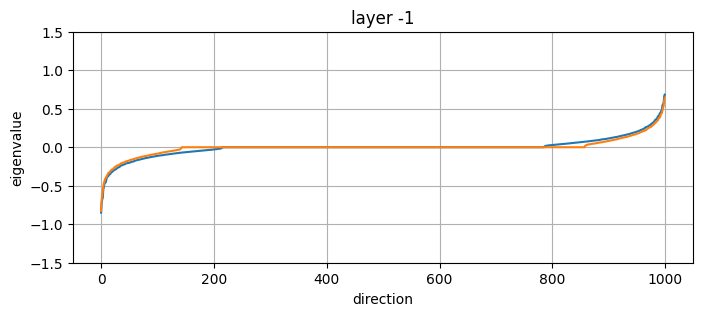

In [20]:
plt.figure(figsize=(8, 3))
# plt.plot(egv[:25])
plt.plot(va1_new[:500] + va1_new[-500:])
plt.plot(va2_new[:500] + va2_new[-500:])
plt.ylim(-1.5, 1.5)
plt.title(f"layer -1")
plt.xlabel("direction")
plt.ylabel("eigenvalue")
plt.grid(True)
plt.savefig("RR_plots/9010_6040.svg", format="svg")

In [10]:
from scipy.linalg import subspace_angles

In [11]:
layer = -1

In [12]:
weight_t1, bias_t1 = get_W_b(lrr_models_9010[layer])
weight_t2, bias_t2 = get_W_b(lrr_models_6040[layer])

In [13]:
va_f1, ve_f1 = eig(weight_t1)
va_f2, ve_f2 = eig(weight_t2)

In [25]:
# Sort F1
idx_f1 = np.argsort(va_f1.real)
sorted_vecs_f1 = ve_f1[:, idx_f1].real  # Use .real if you expect real vectors

# Sort F2
idx_f2 = np.argsort(va_f2.real)
sorted_vecs_f2 = ve_f2[:, idx_f2].real  # FIX 1: Use ve_f2 here!

# Select Top 3 and Bottom 3
edges = [0, 1, 2, 3, 4, 5, -6, -5, -4, -3, -2, -1]
# edges = [0, 1, 2, -3, -2, -1]
# edges = [0, 1, -2, -1]
# edges = [0, -1]

# FIX 2: Slice columns ([:, edges]), not rows
filtered_ve_f1 = sorted_vecs_f1[:, edges]
filtered_ve_f2 = sorted_vecs_f2[:, edges]

In [26]:
# Check Subspace Angles
angles = subspace_angles(filtered_ve_f1, filtered_ve_f2)

In [27]:
# If the largest angle is near 0, the subspaces are effectively the same
# is_same_span = np.max(angles) < 1e-5

print(f"Max angle: {np.max(angles):.3}")
print(f"All angles: {angles}")

Max angle: 0.631
All angles: [0.63051491 0.61244307 0.56673946 0.52039721 0.50245135 0.45990068
 0.4233615  0.41165138 0.36960778 0.32581559 0.32386707 0.30495275]


In [ ]:
# All angles 12: [0.63051491 0.61244307 0.56673946 0.52039721 0.50245135 0.45990068 0.4233615  0.41165138 0.36960778 0.32581559 0.32386707 0.30495275]
# All angles 6: [1.28781973 0.59452083 0.50192221 0.37510486 0.358261   0.33402549]
# All angles 4: [0.58220084 0.45664526 0.42125901 0.34858704]
# All angles 2: [0.43834648 0.36739432]

In [30]:
def get_all_angles_top_k_eigenspace(dict1, dict2):

    for layer in dict1:
        weight_t1, _ = get_W_b(dict1[layer])
        weight_t2, _ = get_W_b(dict2[layer])

        va_f1, ve_f1 = eig(weight_t1)
        va_f2, ve_f2 = eig(weight_t2)

        # Sort F1
        idx_f1 = np.argsort(va_f1.real)
        sorted_vecs_f1 = ve_f1[:, idx_f1].real  # Use .real if you expect real vectors

        # Sort F2
        idx_f2 = np.argsort(va_f2.real)
        sorted_vecs_f2 = ve_f2[:, idx_f2].real  # FIX 1: Use ve_f2 here!

        # Select Top 3 and Bottom 3
        edges = [0, 1, 2, 3, 4, 5, -6, -5, -4, -3, -2, -1]
        # edges = [0, 1, 2, -3, -2, -1]
        # edges = [0, 1, -2, -1]
        # edges = [0, -1]

        # FIX 2: Slice columns ([:, edges]), not rows
        filtered_ve_f1 = sorted_vecs_f1[:, edges]
        filtered_ve_f2 = sorted_vecs_f2[:, edges]

        angles = subspace_angles(filtered_ve_f1, filtered_ve_f2)

        print(f"Layer {layer}: {angles}")

    return


In [31]:
get_all_angles_top_k_eigenspace(lrr_models_9010, lrr_models_6040)

Layer -1: [0.63051491 0.61244307 0.56673946 0.52039721 0.50245135 0.45990068
 0.4233615  0.41165138 0.36960778 0.32581559 0.32386707 0.30495275]
Layer -2: [1.20511093 0.73017862 0.55259571 0.49355331 0.4756427  0.45562475
 0.43374692 0.4219118  0.37647014 0.34784362 0.32800727 0.29780322]
Layer -3: [0.77374701 0.72409438 0.54708233 0.5184591  0.4764766  0.42412817
 0.41285958 0.4053072  0.3864744  0.33837019 0.32245335 0.30741416]
Layer -4: [0.86201964 0.77101391 0.53851002 0.50814863 0.46663096 0.43274601
 0.42135754 0.39685282 0.37870248 0.33484196 0.33414277 0.30821103]
Layer -5: [0.73860166 0.66500813 0.53866133 0.49449769 0.45016848 0.41225362
 0.40397501 0.39630491 0.378178   0.3344964  0.32150729 0.29792933]
Layer -6: [0.67065471 0.65130111 0.52129063 0.48494762 0.45025295 0.43264444
 0.40243187 0.39586382 0.37543214 0.32979162 0.32198327 0.30015985]
Layer -7: [0.78772286 0.66525597 0.49903836 0.47151058 0.44879394 0.4270597
 0.40993166 0.37880726 0.36273015 0.33378134 0.3216582

In [ ]:
# 90-10 vs 60-40
# Layer -1: [0.63051491 0.61244307 0.56673946 0.52039721 0.50245135 0.45990068 0.4233615  0.41165138 0.36960778 0.32581559 0.32386707 0.30495275]
# Layer -2: [1.20511093 0.73017862 0.55259571 0.49355331 0.4756427  0.45562475 0.43374692 0.4219118  0.37647014 0.34784362 0.32800727 0.29780322]
# Layer -3: [0.77374701 0.72409438 0.54708233 0.5184591  0.4764766  0.42412817 0.41285958 0.4053072  0.3864744  0.33837019 0.32245335 0.30741416]
# Layer -4: [0.86201964 0.77101391 0.53851002 0.50814863 0.46663096 0.43274601 0.42135754 0.39685282 0.37870248 0.33484196 0.33414277 0.30821103]
# Layer -5: [0.73860166 0.66500813 0.53866133 0.49449769 0.45016848 0.41225362 0.40397501 0.39630491 0.378178   0.3344964  0.32150729 0.29792933]
# Layer -6: [0.67065471 0.65130111 0.52129063 0.48494762 0.45025295 0.43264444 0.40243187 0.39586382 0.37543214 0.32979162 0.32198327 0.30015985]
# Layer -7: [0.78772286 0.66525597 0.49903836 0.47151058 0.44879394 0.4270597 0.40993166 0.37880726 0.36273015 0.33378134 0.32165821 0.30599682]
# Layer -8: [0.84462514 0.66268686 0.4862711  0.48016144 0.45295561 0.41977642 0.4040107  0.38105161 0.36966758 0.34178795 0.32304001 0.30510054]
# Layer -9: [0.713034   0.69118293 0.51274129 0.48631277 0.43704987 0.41846358 0.38595875 0.37130697 0.35104789 0.33803289 0.31934369 0.3053792 ]
# Layer -10: [0.72521141 0.6954541  0.53060454 0.47722641 0.43625197 0.40753605 0.38487885 0.37565362 0.3522405  0.33895071 0.32241954 0.3050454 ]
# Layer -11: [0.68942513 0.64879581 0.50866876 0.47556892 0.44638897 0.39282582 0.3852722  0.36416916 0.36113622 0.32962266 0.32312203 0.29814561]
# Layer -12: [0.75713219 0.68624321 0.5355915  0.49945112 0.47325749 0.4043675 0.37912532 0.35726626 0.35173643 0.33918248 0.32439514 0.30745529]
# Layer -13: [0.89804813 0.64265    0.51835577 0.48431995 0.46970714 0.40376482 0.36911808 0.36173706 0.34984806 0.32992912 0.31349633 0.3052113 ]
# Layer -14: [1.14370963 0.58792828 0.50404109 0.49123725 0.47137348 0.39412781 0.37980003 0.36534163 0.33729816 0.32422576 0.30319085 0.29462691]
# Layer -15: [0.67994902 0.6696386  0.60397937 0.53168889 0.44956439 0.39378302 0.38807961 0.3447454  0.32895638 0.32617939 0.30012328 0.28490786]
# Layer -16: [0.69385785 0.62628423 0.5212561  0.49216049 0.46777863 0.38928667 0.37921356 0.3511317  0.33357223 0.32247891 0.296443   0.28103852]
# Layer -17: [0.75658828 0.59341855 0.52127947 0.47642777 0.43679163 0.393371 0.37467649 0.35570363 0.34177593 0.31388173 0.29306403 0.28787997]
# Layer -18: [0.8400916  0.70192857 0.56027693 0.49141516 0.44333855 0.42057895 0.39650006 0.37924864 0.34594341 0.31121483 0.29379209 0.2703215 ]
# Layer -19: [1.12797724 0.7380382  0.63441922 0.50510302 0.43077154 0.39993474 0.38130723 0.36058757 0.34389484 0.32972824 0.29860783 0.26489599]
# Layer -20: [0.8427162  0.63945385 0.58128773 0.56246083 0.48550388 0.4444971 0.39411616 0.38909523 0.34238315 0.32006027 0.29111331 0.25441384]
# Layer -21: [0.93644413 0.61292682 0.52496872 0.49959617 0.4716196  0.44486628 0.40017308 0.3667182  0.32681518 0.31960589 0.29459544 0.26403169]
# Layer -22: [0.84948291 0.66742394 0.6074687  0.4973936  0.46154493 0.4191507 0.38969724 0.37559622 0.34468751 0.32885566 0.27959561 0.25108734]
# Layer -23: [0.76020675 0.60640502 0.53370702 0.44752791 0.42663085 0.4070811 0.37965363 0.3717088  0.35405812 0.33792664 0.29502643 0.26010263]
# Layer -24: [1.21962499 0.64331317 0.61636345 0.52075705 0.48078305 0.44467871 0.41215635 0.37794637 0.3619243  0.32870648 0.29605044 0.27215322]
# Layer -25: [0.96181539 0.85306446 0.83563439 0.71846812 0.46536861 0.44470631 0.433729   0.40717591 0.36350473 0.30407492 0.2824905  0.25613578]
# Layer -26: [1.23847576 0.72107267 0.6958536  0.60983175 0.49799533 0.47529807 0.42871798 0.37729428 0.36477738 0.3329943  0.30665775 0.2451865 ]
# Layer -27: [1.22859795 1.01938403 0.76950985 0.66521721 0.5808741  0.53472168 0.50675514 0.43104475 0.39660174 0.32942613 0.30662317 0.2283076 ]
# Layer -28: [1.56725185 0.8766259  0.69684536 0.66424847 0.6036002  0.5522943 0.4868066  0.41304245 0.39167036 0.38457498 0.33685609 0.22381502]
# Layer -29: [1.03815607 0.91238093 0.84577654 0.76361539 0.72234637 0.5581824 0.543634   0.51070773 0.46448715 0.42969549 0.34652932 0.33130934]
# Layer -30: [1.33394838 1.14359847 0.7757614  0.75591674 0.58826436 0.55950282 0.44703894 0.39992526 0.34967354 0.32431914 0.26798226 0.24716256]
# Layer -31: [0.74303307 0.70764188 0.63718709 0.58080532 0.53302539 0.47963647 0.41415351 0.40239237 0.36457233 0.31559883 0.28783733 0.27495277]

In [ ]:
for layer in tqdm(lrr_models_9010):
    weight_t1, _ = get_W_b(lrr_models_9010[layer])
    weight_t2, _ = get_W_b(lrr_models_6040[layer])
    weight_t3, _ = get_W_b(lrr_models_3070[layer])

    va1, _ = eig(weight_t1)
    va2, _ = eig(weight_t2)
    va3, _ = eig(weight_t3)

    va1_real = sorted([i.real for i in va1])
    va2_real = sorted([i.real for i in va2])
    va3_real = sorted([i.real for i in va3])

    plt.figure(figsize=(8, 3))

    plt.plot(va1_real[:225] + va1_real[-225:])
    plt.plot(va2_real[:225] + va2_real[-225:])
    plt.plot(va3_real[:225] + va3_real[-225:])

    plt.ylim(-1.5, 1.5)
    plt.title(f"layer {layer}")
    plt.xlabel("direction")
    plt.ylabel("eigenvalue")
    plt.grid(True)
    plt.savefig(f"RR_plots/three/9010_6040_3070_{layer}.svg", format="svg")

    plt.close()

  0%|          | 0/31 [00:00<?, ?it/s]

  3%|▎         | 1/31 [02:25<1:12:40, 145.34s/it]